../refactor-outputs/layernorm-base/train_574e51abc295d8da78175b320504f2ba_1_2_pretrain_1_dot.pt


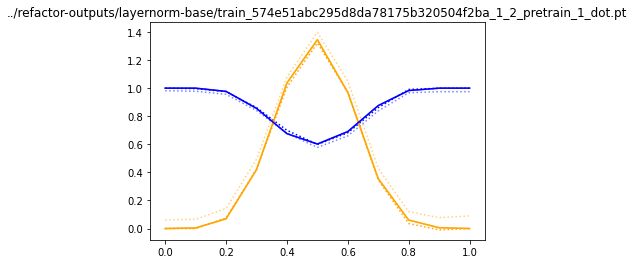

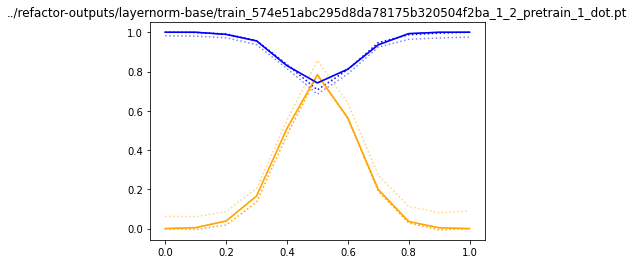

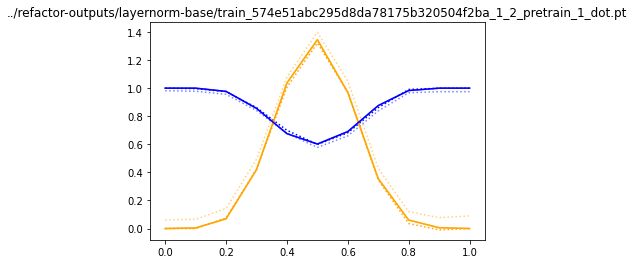

../refactor-outputs/layernorm-base/train_574e51abc295d8da78175b320504f2ba_1_2_pretrain_1_mse.pt


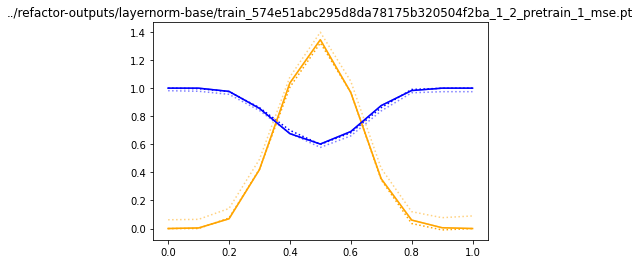

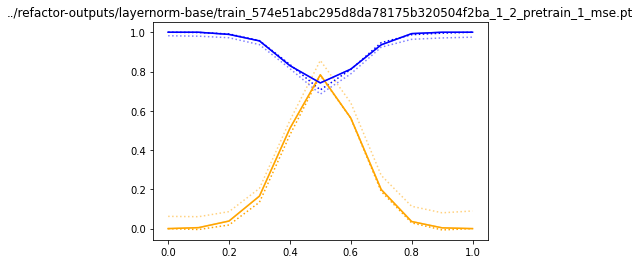

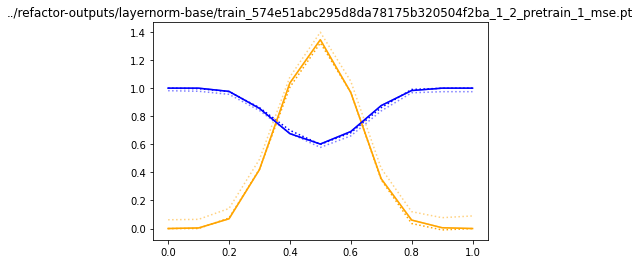

In [71]:
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")


def plot_barriers(ax, stats, linestyle):
    interpolation = stats['interpolation']
    eval_loss = stats['eval_loss']
    acc = stats['acc']
    loss_barrier = stats['loss_barrier']
    acc_barrier = stats['acc_barrier']
    ax.plot(interpolation, eval_loss, c='orange', linestyle=linestyle, alpha=0.5)
    ax.plot(interpolation, acc, c='blue', linestyle=linestyle, alpha=0.5)
    ax.plot(interpolation, loss_barrier, c='orange', linestyle=linestyle)
    ax.plot(interpolation, 1 + acc_barrier, c='blue', linestyle=linestyle)

def plot_train_test_barriers(stats_dict, suffix):
    ax = plt.subplot()
    ax.set_title(suffix)
    ax.set_title(file)
    plot_barriers(ax, stats_dict[f'train_{suffix}'], linestyle='dotted')
    plot_barriers(ax, stats_dict[f'test_{suffix}'], linestyle='solid')
    plt.show()

stats_dir = Path("../refactor-outputs/layernorm-base/")
# for file in stats_dir.glob("*.pt"):
# for file in stats_dir.glob("*pretrain_160_mse.pt"):
for file in stats_dir.glob("train_*.pt"):
    stats_dict = torch.load(file)
    print(file)
    plot_train_test_barriers(stats_dict, "control")
    plot_train_test_barriers(stats_dict, "randperm")
    plot_train_test_barriers(stats_dict, "aligned")
